## Modelling

In [1]:
# Importing important packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats

In [2]:
df7 = pd.read_csv('fresh_cleaned_short_new.csv')

# Vader Lexicon for sentiment score

In [3]:
#NLP
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [4]:
df7['Sentiment'] = (df7['Reviews'].apply(lambda review: sid.polarity_scores(str(review))['compound'])
                  ).apply(lambda c: 'Positive' if c >0 else 'Not Positive')

In [5]:
df=df7.dropna()

In [6]:
df['Reviews']=df['Reviews'].astype('str')

/var/folders/8f/f_vht8sx6l54hbgzsl80w27w0000gn/T/ipykernel_2331/1792198555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reviews']=df['Reviews'].astype('str')


In [7]:
df.head()

,Condition,Drug,Age,Sex,EaseofUse,Effectiveness,Satisfaction,Reviews,Sides,Sentiment
0,"""Change of Life"" Signs",duavee,45-54,Female,5,5,5,just started duavee a little over weeks ago ...,"Stomach upset, nausea / vomiting , bloating...",Positive
1,"""Change of Life"" Signs",angeliq,55-64,Female,4,5,1,i felt great the hot flushes stopped but my ha...,"Dizziness , lightheadedness , headache , st...",Not Positive
2,"""Change of Life"" Signs",neurontin capsule,65-74,Female,5,5,5,info,"Drowsiness, dizziness , loss of coordination,...",Not Positive
3,"""Change of Life"" Signs",angeliq,55-64,Female,5,5,5,i have had a drastic change in my health and g...,"Dizziness , lightheadedness , headache , st...",Not Positive
4,"""Change of Life"" Signs","femring ring, vaginal",55-64,Female,5,5,5,i have used t his to counter vaginal atrophy a...,"Nausea / vomiting , bloating , breast tende...",Positive


In [8]:
#df.to_csv('df_fresh.csv', index = False)

In [9]:
df.Reviews[11]

'i started taking it for menopause hated the way i felt at first but then it was okay for awhile then i noticed all kinds of thing after coming out of the intial fog huge weight gain dificulty urinating joint pain muscle pain breathing problems fatigue etc blood pressure was up cholesterol went up went to my doc and she said had to wean off slowly was on  now down to  feel so tired and still have the electrical shocks but not as bad  more days og  then off totally hope that goes as well as the last phases i can deal with them i just want to feel normal againthe damage it can do is not worth taking for me never had anxiety till i went thru menopause need to find another way to deal with it'

In [10]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer()
X = tfidf_v.fit_transform(df['Reviews'].values.astype('U')) 

In [11]:
X.shape

(103445, 83054)

In [12]:
y = df['Sentiment']

In [13]:
y.shape

(103445,)

In [14]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(77583, 83054) (25862, 83054) (77583,) (25862,)


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#  Logistic Regression model

In [16]:
tfidf_v=TfidfVectorizer()
X=df.Reviews
y=df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)

In [17]:
model= Pipeline([('tfidf', TfidfVectorizer()),('svc', LogisticRegression(penalty='l2',multi_class='auto',class_weight = 'balanced')),])
model.fit(X_train,y_train)
y_testpred=model.predict(X_test)
y_trainpred=model.predict(X_train)

In [18]:
def slog(rev1):
    
    return model.predict(rev1["COl"])

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('accuracy on train set %s' % accuracy_score(y_train,y_trainpred))
print('accuracy on test set %s' % accuracy_score(y_test,y_testpred))
print("*******************************************************")
print(classification_report(y_test,y_testpred))
print(confusion_matrix(y_test,y_testpred))
  

accuracy on train set 0.8806181766624132
accuracy on test set 0.8466862578300208
*******************************************************
              precision    recall  f1-score   support

Not Positive       0.89      0.85      0.87     15731
    Positive       0.78      0.84      0.81     10131

    accuracy                           0.85     25862
   macro avg       0.84      0.85      0.84     25862
weighted avg       0.85      0.85      0.85     25862

[[13394  2337]
 [ 1628  8503]]


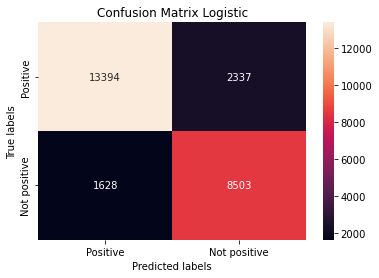

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_testpred)
ax= plt.subplot()
sns.heatmap(cm1,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic')
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);

# Multinomial Naive Bayes

In [21]:
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
  tfidf_v=TfidfVectorizer()
  X=df.Reviews
  y=df.Sentiment
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
  modelmnb=Pipeline([('tfidf', TfidfVectorizer()),
                         ('mnb', MultinomialNB()),])    
  modelmnb.fit(X_train,y_train)
  y_testpredm=modelmnb.predict(X_test)
  y_trainpredm=modelmnb.predict(X_train)

In [22]:
def mnbf(rev1):
    return modelmnb.predict(rev1["COl"])

In [23]:
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredm))
print('accuracy on test set %s' % accuracy_score(y_test, y_testpredm))
print("*******************************************************")
print(classification_report(y_test,y_testpredm))
print(confusion_matrix(y_test,y_testpredm))

accuracy on train set 0.7413479757163296
accuracy on test set 0.6859871626324336
*******************************************************
              precision    recall  f1-score   support

Not Positive       0.66      0.98      0.79     15731
    Positive       0.90      0.22      0.36     10131

    accuracy                           0.69     25862
   macro avg       0.78      0.60      0.58     25862
weighted avg       0.75      0.69      0.62     25862

[[15471   260]
 [ 7861  2270]]


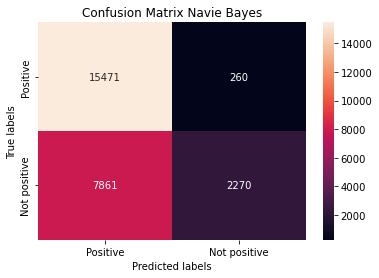

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_testpredm)
ax= plt.subplot()
sns.heatmap(cm3,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Navie Bayes'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);


# Decision tree

In [25]:
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.tree import  DecisionTreeClassifier
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
  tfidf_v=TfidfVectorizer()
  X=df.Reviews
  y=df.Sentiment
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)
   
  modeltree =Pipeline([('tfidf', TfidfVectorizer()),('decisiontree', DecisionTreeClassifier(criterion = 'entropy',max_depth=3))])
  modeltree.fit(X_train,y_train)
  y_testpredtr=modeltree.predict(X_test)
  y_trainpredtr=modeltree.predict(X_train)

In [26]:
def  dt(rev1):
    
    return modeltree.predict(rev1["COl"])

In [27]:
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredtr))
print('accuracy on test set %s' % accuracy_score(y_test, y_testpredtr))
print("*******************************************************")
print(classification_report(y_test,y_testpredtr))
print(confusion_matrix(y_test,y_testpredtr))

accuracy on train set 0.6598997202995501
accuracy on test set 0.6600417601113603
*******************************************************
              precision    recall  f1-score   support

Not Positive       0.65      0.94      0.77     15731
    Positive       0.71      0.23      0.34     10131

    accuracy                           0.66     25862
   macro avg       0.68      0.58      0.56     25862
weighted avg       0.67      0.66      0.60     25862

[[14789   942]
 [ 7850  2281]]


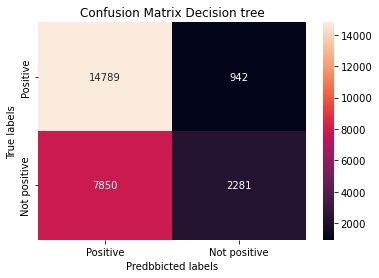

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_testpredtr)
ax= plt.subplot()
sns.heatmap(cm4,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predbbicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Decision tree'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);


# Linear SVC Model

In [29]:
  from sklearn.svm import LinearSVC
  from sklearn.pipeline import Pipeline
  from sklearn.metrics import accuracy_score, confusion_matrix
  tfidf_v=TfidfVectorizer()
  Xsvc=df.Reviews
  ysvc=df.Sentiment
  X_train, X_test, y_train, y_test = train_test_split(Xsvc, ysvc, test_size=0.25, random_state=365)

  modelsvc= Pipeline([('tfidf', TfidfVectorizer()),
                     ('svc', LinearSVC()),])
  modelsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [30]:
def  svcf(rev1):
    return modelsvc.predict(rev1["COl"])       

In [31]:
y_testpredsvc=modelsvc.predict(X_test)
y_trainpredsvc=modelsvc.predict(X_train)
print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredsvc))
print('accuracy on test set %s' % accuracy_score(y_test,y_testpredsvc))
report = classification_report(y_test, y_testpredsvc)
print('Classification Report  regression: \n', report)
print(confusion_matrix(y_testpredsvc,y_test))
   

accuracy on train set 0.9339417140352912
accuracy on test set 0.8537622766994045
Classification Report  regression: 
               precision    recall  f1-score   support

Not Positive       0.87      0.90      0.88     15731
    Positive       0.83      0.79      0.81     10131

    accuracy                           0.85     25862
   macro avg       0.85      0.84      0.85     25862
weighted avg       0.85      0.85      0.85     25862

[[14107  2158]
 [ 1624  7973]]


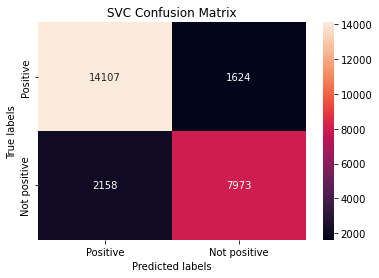

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_testpredsvc)
ax= plt.subplot()
sns.heatmap(cm5,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('SVC Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);

In [33]:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn import metrics
    
    modelfor= Pipeline([('tfidf', TfidfVectorizer()),
                     ('mnb', RandomForestClassifier(n_estimators=50,class_weight ='balanced')),])
    modelfor.fit(X_train, y_train)
    y_testpredfor=modelfor.predict(X_test)
    y_trainpredfor=modelfor.predict(X_train)

In [34]:
def find_rev_tfidf():
    return modelfor.predict(rev1["COl"])

In [35]:

print('accuracy on train set %s' % accuracy_score(y_train, y_trainpredfor))
print('accuracy on test set %s' % accuracy_score(y_test,y_testpredfor))
report = classification_report(y_test, y_testpredfor)
print('Classification Report  regression: \n', report)
#print(confusion_matrix(y_testpredsvc,y_test))

accuracy on train set 0.9999742211566967
accuracy on test set 0.7963034568092182
Classification Report  regression: 
               precision    recall  f1-score   support

Not Positive       0.77      0.94      0.85     15731
    Positive       0.86      0.57      0.69     10131

    accuracy                           0.80     25862
   macro avg       0.82      0.76      0.77     25862
weighted avg       0.81      0.80      0.79     25862



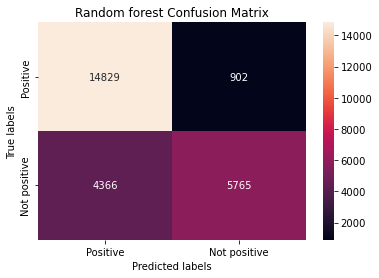

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_testpredfor)
ax= plt.subplot()
sns.heatmap(cm6,annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Random forest Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Not positive']); ax.yaxis.set_ticklabels(['Positive', 'Not positive']);

In [37]:
log_train=(model.score(X_train,y_train))*100
mnb_train=(modelmnb.score(X_train,y_train))*100
lsvc_train=(modelsvc.score(X_train,y_train))*100
dtree_train=(modeltree.score(X_train,y_train))*100
for_train=(modelfor.score(X_train,y_train))*100
print("log_train= ",log_train,"\n mnb_train=",mnb_train,"\nlsvc_train=,",lsvc_train,"\n dtree_train=",dtree_train,"\n for_train=",for_train)

log_train=  88.06181766624131 
 mnb_train= 74.13479757163296 
lsvc_train=, 93.39417140352913 
 dtree_train= 65.98997202995501 
 for_train= 99.99742211566966


In [38]:
log_test=(model.score(X_test,y_test))*100
mnb_test=(modelmnb.score(X_test,y_test))*100
lsvc_test=(modelsvc.score(X_test,y_test))*100
dtree_test=(modeltree.score(X_test,y_test))*100
for_test=(modelfor.score(X_test,y_test))*100
print("log_test= ",log_test,"\n mnb_test=",mnb_test,"\nlsvc_test= ",lsvc_test,"\n dtree_test=",dtree_test,"\n for_test=",for_test)

log_test=  84.66862578300208 
 mnb_test= 68.59871626324336 
lsvc_test=  85.37622766994045 
 dtree_test= 66.00417601113602 
 for_test= 79.63034568092182


In [39]:
from sklearn.model_selection import cross_val_score

In [40]:

print("Log",(cross_val_score(model, X, y, cv=5))*100)

/Users/abhishekjha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/abhishekjha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Log [83.69181691 83.22296873 82.97162743 84.06882885 83.81265407]


In [41]:
print("MNB=",(cross_val_score(modelmnb, X, y, cv=5))*100)

MNB= [68.80467881 66.68277829 67.25796317 67.04045628 68.24399439]


In [42]:
print("LSVC=",(cross_val_score(modelsvc, X, y, cv=5))*100)

LSVC= [83.83198801 83.24230267 82.81212238 83.68698342 83.75948572]


In [43]:
print("Dtree=",(cross_val_score(modeltree, X, y, cv=5))*100)

Dtree= [65.52274155 66.30576635 65.61457779 66.04475808 65.76924936]


In [44]:
print("Forest=",(cross_val_score(modelfor, X, y, cv=2))*100)

Forest= [75.34752431 74.42674297]


In [45]:
data= [" severe back pain , feeling difficult to breath"]
rev1 = pd.DataFrame(data, columns = ['COl'])
rev1

,COl
0,"severe back pain , feeling difficult to breath"


In [46]:
slog(rev1)

array(['Not Positive'], dtype=object)

In [47]:
svcf(rev1)

array(['Not Positive'], dtype=object)

In [48]:
mnbf(rev1)

array(['Not Positive'], dtype='<U12')

In [49]:
dt(rev1)

array(['Not Positive'], dtype=object)

In [50]:
data2= [ "It was helpful to get fastest cure, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic v marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic marvelous extraordinary,best excellent, very effective, genuine, helpful, never thought it would be so good and economic"]
rev1 = pd.DataFrame(data2, columns = ['COl'])
rev1

,COl
0,"It was helpful to get fastest cure, never thou..."


In [51]:
svcf(rev1)

array(['Positive'], dtype=object)

In [52]:
slog(rev1)

array(['Positive'], dtype=object)

In [53]:
mnbf(rev1)

array(['Positive'], dtype='<U12')

In [54]:
dt(rev1)

array(['Not Positive'], dtype=object)

In [55]:
rev1['COl'] = (rev1['COl'].apply(lambda review: sid.polarity_scores(str(review))['compound'])
                  ).apply(lambda c: 'Positive' if c >0 else 'Not Positive')

In [56]:
rev1


,COl
0,Positive


In [57]:
rev1['COl'] = (rev1['COl'].apply(lambda review: sid.polarity_scores(str(review))['compound'])
                  ).apply(lambda c: 'Positive' if c >0 else 'Not Positive')

In [58]:
rev1

,COl
0,Positive


In [59]:
# medicines from cond

def get_med():
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    from sklearn import metrics
    from sklearn.svm import LinearSVC


    Xx = df[['Condition','Drug', 'Age', 'Sex', 'Reviews']].apply(lambda x: ' '.join(x), axis = 1)

    Yy = df['Sentiment']
    
    X_train, X_test, y_train, y_test = train_test_split(Xx, Yy, test_size=0.2, random_state=365)
    
    drug_clsf= Pipeline([('tfidf', TfidfVectorizer()),
                     ('LSVM', LinearSVC()),])
    drug_clsf.fit(X_train, y_train)
    acc = metrics.accuracy_score(y_test, drug_clsf.predict(X_test))
    
    return acc

In [60]:
get_med()

0.8469718207743245